# Exploratory data analysis


In [12]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

### topic

- EDA가 무엇? 왜 중요?

- EDA 과정에서 무엇이 중요한지

- 어떤 tools

- data cleaning

- 캐글 예제

### EDA가 무엇? 

- data를 살펴보면서 "잘 이해하고, 익숙해 지는 것"

- data에 대한 직관 만들기

- feature에 대한 가설 수립 => better score

- 재밌는 insight 발견 => better score

#### Visualization

- 시각화를 하면 즉시 어떤 패턴을 볼 수 있음 => 저 패턴은 뭐지? => 이 패턴을 model에 어떻게 써먹을 수 있을까?

- 어떤 가설을 세웠을 때, 시각화를 통해 test할 수 있음

## Building intuition about the data

### EDA step

- domain 지식 얻기

- 데이터가 직관적인지 체크

- 데이터가 어떻게 생성되었는지 이해

#### domain 지식 얻기

- competition 의 분야가 다양하기 때문에 아주 자세하게는 domain에 대해 알 필요는 없지만

    1. 우리의 목적
    2. 우리가 가진 데이터
    3. 사람들이 보통 어떻게 문제를 해결하는지 
    
정도는 알아야함. 구글링 위키피디아 등등 에서 search

#### 데이터가 직관적인지 체크

- 데이터에 있는 값들이 말이 되는지(말도 안되게 튀는 값), domain 관점에서 봤을 때 말이 되는지.
    > (e.g.) Age 컬럼이 있는데 값이 300 => 걍 손으로 바꿔도 됨 ㅋ

- 이해가 잘 안되면 forum에 질문 고고

- 휴먼에러로 생긴 데이터 오류 말고, logic이나 알고리즘이 이상해서 나오는 반복적인 오류 => feature generation 가능(is_incorrect 같은)

#### 데이터가 어떻게 생성되었는지 이해

- 어떤 방식으로 sampling되었는지 => 바탕으로 validation set 만들기
> train/test set이 각각 다른 알고리즘으로 생성되었다 => train set을 validation set으로 이용할 수 없음.
> 
> 왜냐면 그 validation set이 test set 을 대표할 수 없기 때문

- train/test가 다르게 sampling 된것을 아는 방법
> plot 그려보면 매우 다르다
> 
> train의 period가 test period보다 몇배는 큰데, row 개수는 test가 더 많을 때 => 먼가 이상하다고 봐야함

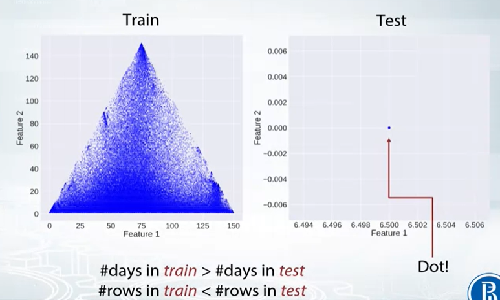

In [19]:
image = Image.open('img1.png')
image.resize((500,300))

## Exploring anonymized data

1. anonymized data란?

2. 우리가 뭘 할 수 있는가?

#### Anonymized data 란
- feature 이름에 아무 의미가 없음
- text 는 hash되어있음
---
#### 우리가 뭘 할 수 있는 가
- 개별 feature 알아보기
    - column의 의미를 추측 (이거는 어려울 때가 많음)
    - column의 타입을 추측 (그럴 땐 이거라도)

---
(시각화때 다룸)
- feature간의 관계를 알아보는 것
    - feature pair의 관계 찾기
    - feature group 찾기


### 강의에서는 코드를 치면서 보여줬기 때문에 process를 말로 설명함.

1. random Forest를 쓸 수 있게, fillna(-999), label encoding with factorize 등등 preprocessing 진행
2. 바로 random Forest 돌려서 feature importance 확인. 가장 높은 몇가지를 집중적으로 파보자
3. 가장 높은 몇가지 변수의 mean, std 확인 => standard scaled 되었음 => 한번 다시 scaled back 해보자
4. 변수의 unique 값을 구하고, np.sort한다음에 np.diff 하여 각 값들의 차이를 본다
5. 0.4332159로 다 나눠주면
6. 수상하게도 소수점 뒷자리가 다 똑같다. 그것을 다 빼주면 비로소 제대로된 값이 나온다
7. 그리고 value_counts 해보면 1968 이라는 값이 나오는데 이걸 보고서 year of birth 라는 변수로 추측할 수 있고
8. type을 datetime으로 알 수 잇음

#### 이런 식으로 feature를 조사해는 것에 대한 현실적인 생각
feature가 많으면 이걸 하나하나 다해봐? 
    
    변수 type정도만이라도 추측해내면 아주 유용하다
> 유용한 함수들
>
> df.dtypes => float(as numeric), integer(as binary encoded, event counter, categorical feature with label encoder), object
> 
> df.info()
> 
> x.value_counts()
> 
> x.isnull()